In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

In [3]:
print(labevents.columns)

Index(['subject_id', 'hadm_id', 'chartdate', 'cpt_cd', 'cpt_number',
       'cpt_suffix', 'ticket_id_seq', 'description', 'costcenter_ICU',
       'costcenter_Resp', 'sectionheader_Anesthesia',
       'sectionheader_Emerging technology',
       'sectionheader_Evaluation and management', 'sectionheader_Medicine',
       'sectionheader_Pathology and laboratory', 'sectionheader_Radiology',
       'sectionheader_Surgery', 'subsectionheader_Bone/joint studies',
       'subsectionheader_Cardiovascular',
       'subsectionheader_Cardiovascular system',
       'subsectionheader_Case management services',
       'subsectionheader_Central nervous system assessments/tests (neuro-cognitive, mental status, speech testing)',
       'subsectionheader_Chemistry',
       'subsectionheader_Confirmatory consultation for a new or established patient (deleted codes)',
       'subsectionheader_Conscious sedation (deleted codes)',
       'subsectionheader_Consultations',
       'subsectionheader_Critical car

C:\Users\KIIT\AppData\Local\Temp\ipykernel_20744\3703983063.py:14: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  labevents = pd.read_csv('C:/Users/KIIT/Downloads/cptevents.csv')


              precision    recall  f1-score   support

           0       0.94      0.99      0.96     11086
           1       0.11      0.02      0.03       710

    accuracy                           0.93     11796
   macro avg       0.52      0.50      0.50     11796
weighted avg       0.89      0.93      0.91     11796

ROC AUC Score: 0.5490


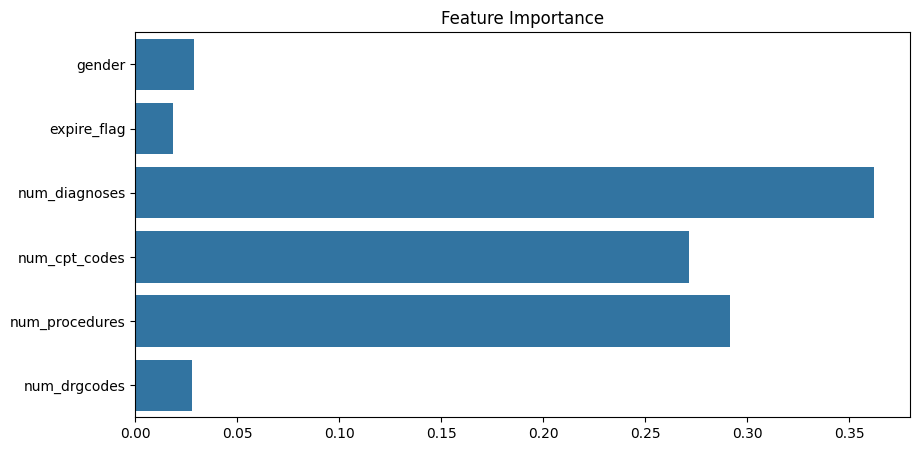

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

admissions = pd.read_csv('C:/Users/KIIT/Downloads/admissions.csv')
patients = pd.read_csv('C:/Users/KIIT/Downloads/patients.csv')
diagnoses_icd = pd.read_csv('C:/Users/KIIT/Downloads/diagnoses.csv')
labevents = pd.read_csv('C:/Users/KIIT/Downloads/cptevents.csv')
proceduresicd = pd.read_csv('C:/Users/KIIT/Downloads/procedures.csv')
drgcodes = pd.read_csv('C:/Users/KIIT/Downloads/drgcodes.csv')
d_labitems = pd.read_csv('C:/Users/KIIT/Downloads/d_labitems.csv') 
admissions['admittime'] = pd.to_datetime(admissions['admittime'])
admissions['dischtime'] = pd.to_datetime(admissions['dischtime'])

admissions = admissions.sort_values(['subject_id', 'admittime'])
admissions['next_admit'] = admissions.groupby('subject_id')['admittime'].shift(-1)
admissions['readmitted_30d'] = ((admissions['next_admit'] - admissions['dischtime']).dt.days <= 30).astype(int)

patients = patients[['subject_id', 'gender', 'expire_flag']]
admissions = admissions.merge(patients, on='subject_id', how='left')

diagnoses_count = diagnoses_icd.groupby('hadm_id')['icd9_code'].nunique().reset_index()
diagnoses_count.columns = ['hadm_id', 'num_diagnoses']
admissions = admissions.merge(diagnoses_count, on='hadm_id', how='left')

t_cpt_counts = labevents.groupby('hadm_id')['cpt_cd'].nunique().reset_index()
t_cpt_counts.columns = ['hadm_id', 'num_cpt_codes']
admissions = admissions.merge(t_cpt_counts, on='hadm_id', how='left')

procedures_count = proceduresicd.groupby('hadm_id')['icd9_code'].nunique().reset_index()
procedures_count.columns = ['hadm_id', 'num_procedures']
admissions = admissions.merge(procedures_count, on='hadm_id', how='left')

drgcodes_count = drgcodes.groupby('hadm_id')['drg_code'].nunique().reset_index()
drgcodes_count.columns = ['hadm_id', 'num_drgcodes']
admissions = admissions.merge(drgcodes_count, on='hadm_id', how='left')

features = ['gender', 'expire_flag', 'num_diagnoses', 'num_cpt_codes', 'num_procedures', 'num_drgcodes']
label = 'readmitted_30d'


encoder = LabelEncoder()
admissions['gender'] = encoder.fit_transform(admissions['gender'])

X = admissions[features].fillna(0)
y = admissions[label]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]


print(classification_report(y_test, y_pred))
print(f'ROC AUC Score: {roc_auc_score(y_test, y_prob):.4f}')


plt.figure(figsize=(10,5))
sns.barplot(x=clf.feature_importances_, y=features)
plt.title('Feature Importance')
plt.show()


C:\Users\KIIT\AppData\Local\Temp\ipykernel_20744\3520550752.py:14: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  labevents = pd.read_csv('C:/Users/KIIT/Downloads/cptevents.csv')


              precision    recall  f1-score   support

           0       0.94      1.00      0.97     11086
           1       0.00      0.00      0.00       710

    accuracy                           0.94     11796
   macro avg       0.47      0.50      0.48     11796
weighted avg       0.88      0.94      0.91     11796

ROC AUC Score: 0.4763


c:\Users\KIIT\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\KIIT\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\KIIT\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

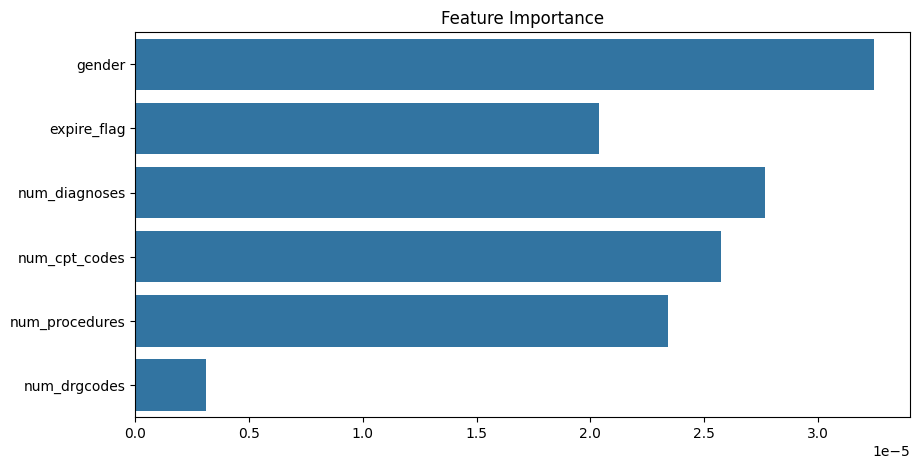

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score


admissions = pd.read_csv('C:/Users/KIIT/Downloads/admissions.csv')
patients = pd.read_csv('C:/Users/KIIT/Downloads/patients.csv')
diagnoses_icd = pd.read_csv('C:/Users/KIIT/Downloads/diagnoses.csv')
labevents = pd.read_csv('C:/Users/KIIT/Downloads/cptevents.csv')
proceduresicd = pd.read_csv('C:/Users/KIIT/Downloads/procedures.csv')
drgcodes = pd.read_csv('C:/Users/KIIT/Downloads/drgcodes.csv')
d_labitems = pd.read_csv('C:/Users/KIIT/Downloads/d_labitems.csv') 


admissions['admittime'] = pd.to_datetime(admissions['admittime'])
admissions['dischtime'] = pd.to_datetime(admissions['dischtime'])

admissions = admissions.sort_values(['subject_id', 'admittime'])
admissions['next_admit'] = admissions.groupby('subject_id')['admittime'].shift(-1)
admissions['readmitted_30d'] = ((admissions['next_admit'] - admissions['dischtime']).dt.days <= 30).astype(int)

patients = patients[['subject_id', 'gender', 'expire_flag']]
admissions = admissions.merge(patients, on='subject_id', how='left')

diagnoses_count = diagnoses_icd.groupby('hadm_id')['icd9_code'].nunique().reset_index()
diagnoses_count.columns = ['hadm_id', 'num_diagnoses']
admissions = admissions.merge(diagnoses_count, on='hadm_id', how='left')

t_cpt_counts = labevents.groupby('hadm_id')['cpt_cd'].nunique().reset_index()
t_cpt_counts.columns = ['hadm_id', 'num_cpt_codes']
admissions = admissions.merge(t_cpt_counts, on='hadm_id', how='left')

procedures_count = proceduresicd.groupby('hadm_id')['icd9_code'].nunique().reset_index()
procedures_count.columns = ['hadm_id', 'num_procedures']
admissions = admissions.merge(procedures_count, on='hadm_id', how='left')

drgcodes_count = drgcodes.groupby('hadm_id')['drg_code'].nunique().reset_index()
drgcodes_count.columns = ['hadm_id', 'num_drgcodes']
admissions = admissions.merge(drgcodes_count, on='hadm_id', how='left')

features = ['gender', 'expire_flag', 'num_diagnoses', 'num_cpt_codes', 'num_procedures', 'num_drgcodes']
label = 'readmitted_30d'

encoder = LabelEncoder()
admissions['gender'] = encoder.fit_transform(admissions['gender'])

X = admissions[features].fillna(0)
y = admissions[label]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

clf = SVC(kernel='linear', probability=True, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print(f'ROC AUC Score: {roc_auc_score(y_test, y_prob):.4f}')

plt.figure(figsize=(10,5))
sns.barplot(x=np.abs(clf.coef_[0]), y=features)
plt.title('Feature Importance')
plt.show()


C:\Users\KIIT\AppData\Local\Temp\ipykernel_19720\1601396895.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  labevents = pd.read_csv('C:/Users/KIIT/Downloads/cptevents.csv')


Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     11086
           1       0.11      0.02      0.03       710

    accuracy                           0.93     11796
   macro avg       0.52      0.50      0.50     11796
weighted avg       0.89      0.93      0.91     11796

ROC AUC Score: 0.5490

Support Vector Machine:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     11086
           1       0.00      0.00      0.00       710

    accuracy                           0.94     11796
   macro avg       0.47      0.50      0.48     11796
weighted avg       0.88      0.94      0.91     11796

ROC AUC Score: 0.4763


c:\Users\KIIT\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\KIIT\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\KIIT\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

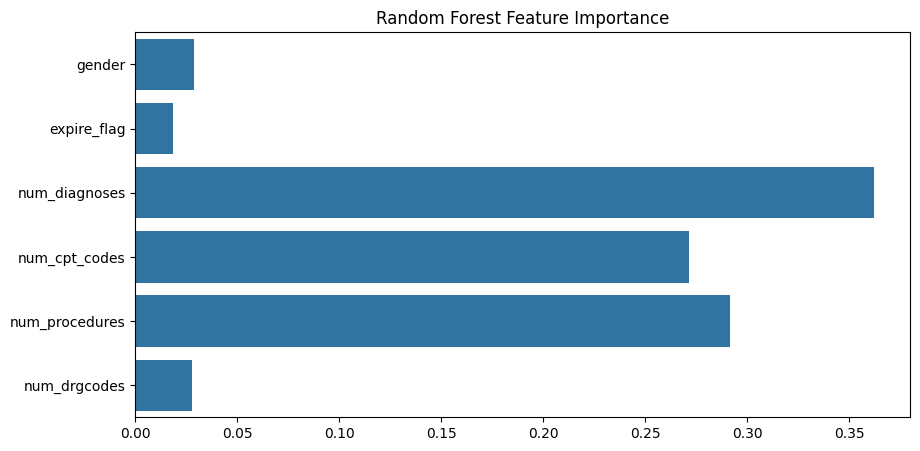

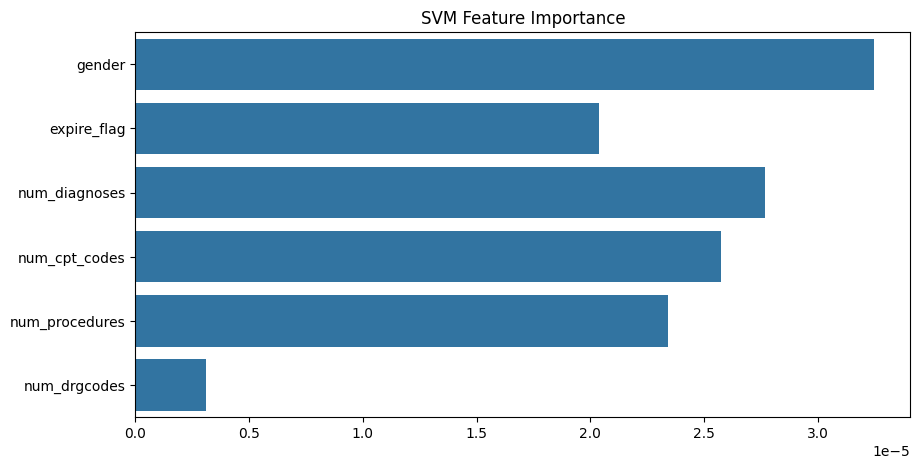

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score

admissions = pd.read_csv('C:/Users/KIIT/Downloads/admissions.csv')
patients = pd.read_csv('C:/Users/KIIT/Downloads/patients.csv')
diagnoses_icd = pd.read_csv('C:/Users/KIIT/Downloads/diagnoses.csv')
labevents = pd.read_csv('C:/Users/KIIT/Downloads/cptevents.csv')
proceduresicd = pd.read_csv('C:/Users/KIIT/Downloads/procedures.csv')
drgcodes = pd.read_csv('C:/Users/KIIT/Downloads/drgcodes.csv')
d_labitems = pd.read_csv('C:/Users/KIIT/Downloads/d_labitems.csv', low_memory=False)  

admissions['admittime'] = pd.to_datetime(admissions['admittime'])
admissions['dischtime'] = pd.to_datetime(admissions['dischtime'])

admissions = admissions.sort_values(['subject_id', 'admittime'])
admissions['next_admit'] = admissions.groupby('subject_id')['admittime'].shift(-1)
admissions['readmitted_30d'] = ((admissions['next_admit'] - admissions['dischtime']).dt.days <= 30).astype(int)

patients = patients[['subject_id', 'gender', 'expire_flag']]
admissions = admissions.merge(patients, on='subject_id', how='left')

diagnoses_count = diagnoses_icd.groupby('hadm_id')['icd9_code'].nunique().reset_index()
diagnoses_count.columns = ['hadm_id', 'num_diagnoses']
admissions = admissions.merge(diagnoses_count, on='hadm_id', how='left')

t_cpt_counts = labevents.groupby('hadm_id')['cpt_cd'].nunique().reset_index()
t_cpt_counts.columns = ['hadm_id', 'num_cpt_codes']
admissions = admissions.merge(t_cpt_counts, on='hadm_id', how='left')

procedures_count = proceduresicd.groupby('hadm_id')['icd9_code'].nunique().reset_index()
procedures_count.columns = ['hadm_id', 'num_procedures']
admissions = admissions.merge(procedures_count, on='hadm_id', how='left')

drgcodes_count = drgcodes.groupby('hadm_id')['drg_code'].nunique().reset_index()
drgcodes_count.columns = ['hadm_id', 'num_drgcodes']
admissions = admissions.merge(drgcodes_count, on='hadm_id', how='left')

features = ['gender', 'expire_flag', 'num_diagnoses', 'num_cpt_codes', 'num_procedures', 'num_drgcodes']
label = 'readmitted_30d'

encoder = LabelEncoder()
admissions['gender'] = encoder.fit_transform(admissions['gender'])

X = admissions[features].fillna(0)
y = admissions[label]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
y_prob_rf = rf_clf.predict_proba(X_test)[:, 1]

svm_clf = SVC(kernel='linear', probability=True, random_state=42)
svm_clf.fit(X_train, y_train)
y_pred_svm = svm_clf.predict(X_test)
y_prob_svm = svm_clf.predict_proba(X_test)[:, 1]

print("Random Forest Classifier:")
print(classification_report(y_test, y_pred_rf))
print(f'ROC AUC Score: {roc_auc_score(y_test, y_prob_rf):.4f}')

print("\nSupport Vector Machine:")
print(classification_report(y_test, y_pred_svm))
print(f'ROC AUC Score: {roc_auc_score(y_test, y_prob_svm):.4f}')


plt.figure(figsize=(10,5))
sns.barplot(x=rf_clf.feature_importances_, y=features)
plt.title('Random Forest Feature Importance')
plt.show()

plt.figure(figsize=(10,5))
sns.barplot(x=np.abs(svm_clf.coef_[0]), y=features)
plt.title('SVM Feature Importance')
plt.show()